
 **Nishant Kumar, B.Tech 3rd Year in Mathematics and Computing, IIT Goa.**
    

# Fetching dataset from kaggle

In [12]:
! pip install -q kaggle

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"nishant19041","key":"d5974d6732a5cc8837c5f160e013a130"}'}

In [14]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! cp kaggle.json ~/.kaggle/

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets list

ref                                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/ankanhore545/cost-of-living-index-2022                           Cost of Living Index 2022                           176KB  2022-03-26 04:56:04           1570         23  1.0              
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                               2KB  2022-04-04 09:04:10           4793        304  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease              3MB  2022-02-16 10:18:03           7345        162  1.0              
datasets/k

In [19]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 47.5MB/s]


In [20]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#### First let us import the required Libraries

In [21]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

# Data Understanding, Preparation and EDA 

#### Let us read the given Dataset

In [22]:
houses_data = pd.read_csv("train.csv")

In [23]:
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
houses_data.shape

(1460, 81)

In [25]:
# Storing all the Column Names in a List
houses_data.columns.tolist() 

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [26]:
houses_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
# Checking the Number of Missing Values in each Column of the DataFrame
no_of_null_columwise = houses_data.isnull().sum() 

In [29]:
# Checking which Columns have atleast one Null Value
no_of_null_columwise[lambda x : x>0] 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Dealing with NaN Values 

**1) From the above data, It can be clearly seen that Out of 1460 Rows, the Columns `Alley, PoolQC, Fence, MiscFeature` have most of the Rows with Null Values.** 

**2) `FireplaceQu` Column has Half amount as Null Values.**

**3) `Id` Column is also not required for our analysis.**

*So It is advisable to remove them from our Dataset*

In [30]:
# Dropping the Columns from the Dataframe

houses_data.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace=True)

In [31]:
houses_data.shape

(1460, 75)

In [32]:
# Now let us check remaining Columns with Null Values

columns_with_null =  houses_data.isnull().sum()[lambda x : x>0].index.values.tolist()

In [33]:
columns_with_null

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Replacing the NaN columns with MODE of the Corrseponding Columns

In [34]:
for col in columns_with_null :
    houses_data[col].fillna(houses_data[col].mode()[0], inplace=True)

In [35]:
# Finally, Let us Check for Missing Values in each Column of the DataFrame

no_of_null_columwise = houses_data.isnull().sum() 
no_of_null_columwise[lambda x : x>0]

Series([], dtype: int64)

### Now We have no more Null Values in our Dataframe !

## Data Encoding ( Categorical to Numerical values)

In [36]:
houses_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [37]:
# Selecting the columns which have "object" Datatype

Non_Numerical_Columns = houses_data.select_dtypes(include=["object"]).columns.tolist()
Non_Numerical_Columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [38]:
# Using Label Encoder to transform all the columns with the Categorical Values to Numerical Values

for col in Non_Numerical_Columns:
    lb=LabelEncoder()
    houses_data[col]=lb.fit_transform(houses_data[col])

In [39]:
# Now let us check dataframe whether it has only int or float !

houses_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


## Oulier Detection and Removal

In [40]:
# This helping in checking the percentiles

houses_data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,68.267123,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.356355,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,63.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [41]:
"""
Defining a Function which takes a Dataframe as Input and iterates over each column and 
checks whether type of Column values are int/float and then computes percentiles and 
then Caps the values of each column to avoid the Outliers!
"""

def capping_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [42]:
# Calling the above function on our Dataset

houses_data=capping_data(houses_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Inte

## Data Visualisation with seaborn

#### Since `LotArea` is very Important Feature, Let us analyse `LotArea` feature of the given Housing Prices Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


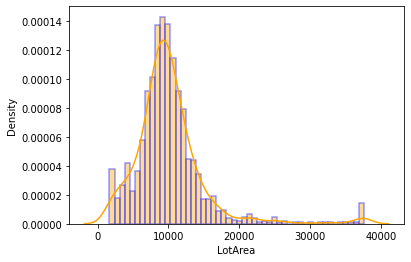

In [43]:
# Plotting the Distribution Plot along with Gaussian Kernel Density Estimate 

sns.distplot(houses_data['LotArea'],kde=True,bins=50,color="Orange",hist_kws=dict(edgecolor="b", linewidth=1.5))

In [44]:
print("Minimum LotArea in the data is:",houses_data.LotArea.min())
print("Maximum LotArea in the data is:",houses_data.LotArea.max())
print("Range of LotArea is from {} to {}, value is {}".format(houses_data.LotArea.min(),houses_data.LotArea.max(),houses_data.LotArea.max()-houses_data.LotArea.min()))
print("I used a bin size of 50, so each bar corresponds to the value of:",(houses_data.LotArea.max()-houses_data.LotArea.min())/50)

Minimum LotArea in the data is: 1680.0
Maximum LotArea in the data is: 37567.64000000021
Range of LotArea is from 1680.0 to 37567.64000000021, value is 35887.64000000021
I used a bin size of 50, so each bar corresponds to the value of: 717.7528000000042


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


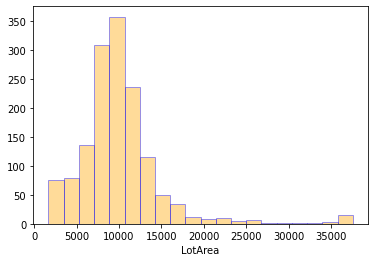

In [45]:
# Plotting only the Histogram using Different Bin Size

sns.distplot(houses_data['LotArea'],kde=False,hist=True,bins=20,color= "Orange",hist_kws=dict(edgecolor="b", linewidth=1.0))

Q1 Value: 7553.5
Median Value: 9478.5
Q3 Value: 11601.5
Upper whisker limit: 17673.5
Lower whisker limit: 1481.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


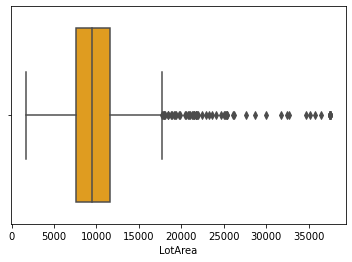

In [46]:
# Plotting the Box Plot 
sns.boxplot(houses_data['LotArea'],color ="Orange")

# Evaluating the Percentiles and Interquartile range (IQR)
Q3 = houses_data.LotArea.quantile(.75)
Q1 = houses_data.LotArea.quantile(.25)
IQR = Q3 - Q1

# Finding the Median
Median = houses_data.LotArea.median()
print("Q1 Value:",Q1)
print("Median Value:",houses_data.LotArea.median())
print("Q3 Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lower whisker limit:",(Q1 - 1.5*IQR))

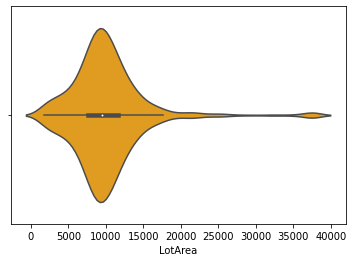

In [47]:
# Checking the Symmetry of the LotArea Feature

sns.violinplot(x='LotArea',data=houses_data,color ="Orange")

### Heatmaps
Using **Correlation** to measure how strong a relationship is between two variables. 

In [48]:
houses_data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.037329,-0.385564,-0.287184,NaN,0.119289,-0.002940,NaN,0.075910,-0.024344,...,-0.014892,-0.034923,-0.027292,NaN,-0.027886,-0.013585,-0.021407,0.012464,-0.024940,-0.088827
MSZoning,0.037329,1.000000,-0.117687,-0.067780,NaN,0.070866,-0.026341,NaN,-0.009090,-0.014015,...,0.134879,0.001249,0.013503,NaN,0.020872,-0.027176,-0.017449,0.086518,-0.010380,-0.205091
LotFrontage,-0.385564,-0.117687,1.000000,0.436806,NaN,-0.089230,-0.043980,NaN,-0.149185,0.035690,...,-0.002927,0.056581,0.044898,NaN,-0.000841,0.014152,0.003798,-0.037379,0.067027,0.350964
LotArea,-0.287184,-0.067780,0.436806,1.000000,NaN,-0.264898,-0.147885,NaN,-0.176358,0.269631,...,-0.018566,0.051020,0.095568,NaN,0.060646,-0.005922,-0.035254,0.001122,0.045053,0.386883
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.027176,0.014152,-0.005922,NaN,-0.033455,-0.011599,NaN,0.018902,0.004384,...,-0.024617,0.033174,0.025260,NaN,0.014196,1.000000,-0.145721,-0.047386,0.013320,0.059428
YrSold,-0.021407,-0.017449,0.003798,-0.035254,NaN,0.036449,0.020507,NaN,-0.005992,-0.010619,...,-0.005089,0.012480,0.016099,NaN,0.053430,-0.145721,1.000000,-0.002327,0.003880,-0.029803
SaleType,0.012464,0.086518,-0.037379,0.001122,NaN,-0.000911,-0.025754,NaN,0.014325,0.054935,...,-0.014453,-0.012758,0.000431,NaN,0.004429,-0.047386,-0.002327,1.000000,0.184067,-0.056446
SaleCondition,-0.024940,-0.010380,0.067027,0.045053,NaN,-0.038118,0.033809,NaN,0.051579,-0.039032,...,-0.088401,0.000387,-0.022663,NaN,0.013882,0.013320,0.003880,0.184067,1.000000,0.228576


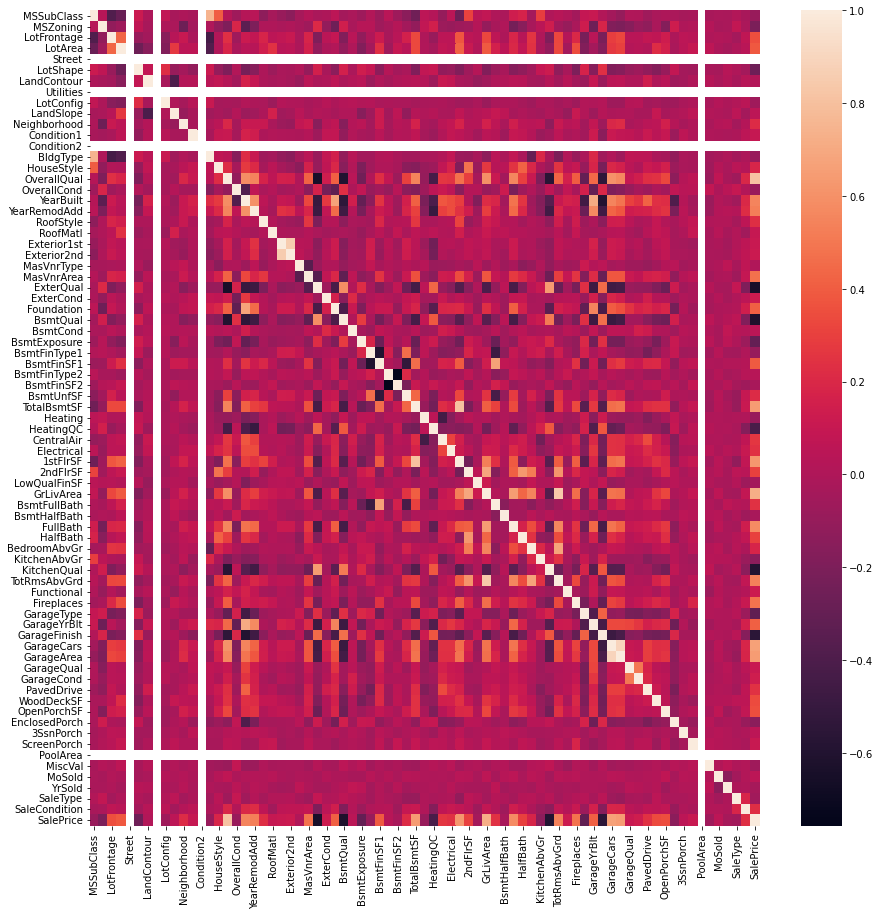

In [49]:
# HaetMap of the Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(houses_data.corr())

# Model Building and Evaluation 

###### For Building the Model, We first need to define the `Dependent` and `Independent` Variables

###### Independent Variable is any how fixed that is `SalePrice` of the House
###### But While choosing the **Dependent** Variables for estimating the `SalePrice` Both the technical and business aspects must be considered..

In [51]:
# Independent Variable
Y = houses_data[['SalePrice']].values
Y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [52]:
# Dependent Variables
X = houses_data.loc[:, houses_data.columns != 'SalePrice'].values
X

array([[  60.,    3.,   65., ..., 2008.,    8.,    4.],
       [  20.,    3.,   80., ..., 2007.,    8.,    4.],
       [  60.,    3.,   68., ..., 2008.,    8.,    4.],
       ...,
       [  70.,    3.,   66., ..., 2010.,    8.,    4.],
       [  20.,    3.,   68., ..., 2010.,    8.,    4.],
       [  20.,    3.,   75., ..., 2008.,    8.,    4.]])

In [53]:
# Splitting the Data in Training and Testing Sets

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state= 20)

### Ridge Regression 


In [54]:
Alpha_values=[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-4,1e-3,1e-2,1e-1,0.2,0.3,0.3,0.4,0.5,0.7,0.9,1,2.5,3,5,10,20,30,40,100]

# Iterating over the List of Alpha Values to find the Optimal One
for i in Alpha_values:
    
        # Instantiating the Model with different values of i 
        ridge_model=Ridge(alpha=i, normalize = True, random_state = 42 )
        
        # Fitting the Model into Training Data 
        ridge_model.fit(X_train,Y_train)
        
        # Making Prediction on the Test Data
        Y_predicted = ridge_model.predict(X_test)
        
        # Evaluating the Model :
        # We dont use usual "mean_squared_error" for Evaluating the Model. We use "r2_score" Instead.
        score = round(r2_score(Y_test,Y_predicted),5)
        
        print("When Lambda (Aplha) value is :",i,"\t-> R2_score is :",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.75505e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureW

When Lambda (Aplha) value is : 1e-15 	-> R2_score is : 0.8841
When Lambda (Aplha) value is : 1e-13 	-> R2_score is : 0.8841
When Lambda (Aplha) value is : 1e-11 	-> R2_score is : 0.8841
When Lambda (Aplha) value is : 1e-09 	-> R2_score is : 0.8841
When Lambda (Aplha) value is : 1e-07 	-> R2_score is : 0.8841
When Lambda (Aplha) value is : 1e-05 	-> R2_score is : 0.88409
When Lambda (Aplha) value is : 0.0001 	-> R2_score is : 0.88406
When Lambda (Aplha) value is : 0.001 	-> R2_score is : 0.88419
When Lambda (Aplha) value is : 0.01 	-> R2_score is : 0.88722
When Lambda (Aplha) value is : 0.1 	-> R2_score is : 0.88874
When Lambda (Aplha) value is : 0.2 	-> R2_score is : 0.88633
When Lambda (Aplha) value is : 0.3 	-> R2_score is : 0.88329
When Lambda (Aplha) value is : 0.3 	-> R2_score is : 0.88329
When Lambda (Aplha) value is : 0.4 	-> R2_score is : 0.88005


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

When Lambda (Aplha) value is : 0.5 	-> R2_score is : 0.87671
When Lambda (Aplha) value is : 0.7 	-> R2_score is : 0.86998
When Lambda (Aplha) value is : 0.9 	-> R2_score is : 0.86324
When Lambda (Aplha) value is : 1 	-> R2_score is : 0.85989
When Lambda (Aplha) value is : 2.5 	-> R2_score is : 0.81105
When Lambda (Aplha) value is : 3 	-> R2_score is : 0.79536
When Lambda (Aplha) value is : 5 	-> R2_score is : 0.7358
When Lambda (Aplha) value is : 10 	-> R2_score is : 0.61191
When Lambda (Aplha) value is : 20 	-> R2_score is : 0.45019
When Lambda (Aplha) value is : 30 	-> R2_score is : 0.354
When Lambda (Aplha) value is : 40 	-> R2_score is : 0.29115
When Lambda (Aplha) value is : 100 	-> R2_score is : 0.14028


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

**Let us check the Optimal Value of Lambda with builtin Functions also**

In [55]:
alpha_values={'alpha':Alpha_values}

# Instantiating the Model
ridge=Ridge(normalize = True,random_state = 42 )

ridge_model=GridSearchCV(ridge,alpha_values,scoring='neg_mean_squared_error',cv=5)

ridge_model.fit(X_train,Y_train)

opt_lambda_r =  ridge_model.best_params_

print("Best Possible Value of Lambda(Alpha) is : ",opt_lambda_r['alpha'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.81795e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureW

Best Possible Value of Lambda(Alpha) is :  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

**So even using the Builtin function `GridSearchCV` gave the same value of Lambda(Alpha)**

**So the Optimal Value of Lambda in Ridge Rergession is `0.1` and the Corresponding Score is `0.89056`** 



### Lasso Regression 


In [56]:
Alpha_values=[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-4,1e-3,1e-2,1e-1,0.2,0.3,0.3,0.4,0.5,0.7,0.9,1,2.5,3,5,10,20,30,40,100]

# Iterating over the List of Alpha Values to find the Optimal One
for i in Alpha_values:
    
        # Instantiating the Model with different values of i 
        lasso_model=Lasso(alpha=i, normalize = True,random_state = 42 )
        
        # Fitting the Model into Training Data 
        lasso_model.fit(X_train,Y_train)
        
        # Making Prediction on the Test Data
        Y_predicted = lasso_model.predict(X_test)
        
        # Evaluating the Model :
        # We dont use usual "mean_squared_error" for Evaluating the Model. We use "r2_score" Instead.
        score = round(r2_score(Y_test,Y_predicted),5)
        
        print("When Lambda (Aplha) value is :",i,"\t-> R2_score is :",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+11, tolerance: 6.

When Lambda (Aplha) value is : 1e-15 	-> R2_score is : 0.88394
When Lambda (Aplha) value is : 1e-13 	-> R2_score is : 0.88394


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+11, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 1e-11 	-> R2_score is : 0.88394
When Lambda (Aplha) value is : 1e-09 	-> R2_score is : 0.88394


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+11, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 1e-07 	-> R2_score is : 0.88394
When Lambda (Aplha) value is : 1e-05 	-> R2_score is : 0.88394


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.573e+11, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 0.0001 	-> R2_score is : 0.88394
When Lambda (Aplha) value is : 0.001 	-> R2_score is : 0.88394


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+11, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 0.01 	-> R2_score is : 0.88394
When Lambda (Aplha) value is : 0.1 	-> R2_score is : 0.88392


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+10, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 0.2 	-> R2_score is : 0.8839
When Lambda (Aplha) value is : 0.3 	-> R2_score is : 0.88386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.374e+09, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 0.3 	-> R2_score is : 0.88386
When Lambda (Aplha) value is : 0.4 	-> R2_score is : 0.88382
When Lambda (Aplha) value is : 0.5 	-> R2_score is : 0.88377


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+09, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set

When Lambda (Aplha) value is : 0.7 	-> R2_score is : 0.88359
When Lambda (Aplha) value is : 0.9 	-> R2_score is : 0.88354
When Lambda (Aplha) value is : 1 	-> R2_score is : 0.88356
When Lambda (Aplha) value is : 2.5 	-> R2_score is : 0.89012
When Lambda (Aplha) value is : 3 	-> R2_score is : 0.89026
When Lambda (Aplha) value is : 5 	-> R2_score is : 0.89087
When Lambda (Aplha) value is : 10 	-> R2_score is : 0.89351
When Lambda (Aplha) value is : 20 	-> R2_score is : 0.8941
When Lambda (Aplha) value is : 30 	-> R2_score is : 0.8925
When Lambda (Aplha) value is : 40 	-> R2_score is : 0.89057
When Lambda (Aplha) value is : 100 	-> R2_score is : 0.87376


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

**Let us check the Optimal Value of Lambda with builtin Functions also**

In [57]:
alpha_values={'alpha':Alpha_values}

# Instantiating the Model
lasso=Lasso(normalize = True,random_state = 42)

lasso_model=GridSearchCV(lasso,alpha_values,scoring='neg_mean_squared_error',cv=5)

lasso_model.fit(X_train,Y_train)

opt_lambda_l =  lasso_model.best_params_

print("Best Possible Value of Lambda(Alpha) is : ",opt_lambda_l['alpha'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.711e+11, tolerance: 5.

Best Possible Value of Lambda(Alpha) is :  10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

**So even using the Builtin function `GridSearchCV` gave the same value of Lambda(Alpha)**

**So the Optimal Value of Lambda in Lasso Rergession is `30` and the Corresponding Score is `0.89303`** 



# Lets perform analysis to pick the top 5 features.


*First lets Determine the optimal value of lambda for ridge and lasso regression.*

In [58]:
print("Best Possible Value of Lambda(Alpha) for Ridge Regression is : ",opt_lambda_r['alpha'])
print("Best Possible Value of Lambda(Alpha) for Lasso Regression is : ",opt_lambda_l['alpha'])

Best Possible Value of Lambda(Alpha) for Ridge Regression is :  0.1
Best Possible Value of Lambda(Alpha) for Lasso Regression is :  10


Using the optimal values of Lambda for the Ridge & Lasso regression, we got almost similar R2 score. So, we will use Lasso regression with the optimal lambda value for proceeding further.

*Now Lets see which features are significant in predicting the price of a house, which inturn helps us in picking top 5 features.*

In [59]:
# Usual Training the Model with Optimal Lambda

lasso_model=Lasso(alpha=opt_lambda_l['alpha'])
lasso_model.fit(X_train,Y_train)
Y_predicted=lasso_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+11, tolerance: 6.434e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [60]:
# Coefficients found by our Model
coefficients= lasso_model.coef_

In [61]:
# List of Columns used for Training
columns = houses_data.loc[:, houses_data.columns != 'SalePrice'].columns.tolist()

In [62]:
# Creating a Dictionary which has Keys as Column Names and Values as Coefficient of that particular Variable found by Model

col_coef =  zip(columns,coefficients)
col_coef_dict =  dict(col_coef)

In [63]:
# Sorting the Elements in the Dictionary in Descending order with Keys

sorted_col_coef_dict = dict( sorted(col_coef_dict.items(), key=operator.itemgetter(1),reverse=True))

significant_col = list(sorted_col_coef_dict.keys())

print('The top 25 Significant Variables in predicting the price of a house are :-\n',significant_col[:25])

The top 25 Significant Variables in predicting the price of a house are :-
 ['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces', 'Functional', 'LandContour', 'MasVnrType', 'SaleCondition', 'Foundation', 'GarageCond', 'BsmtFullBath', 'ExterCond', 'PavedDrive', 'RoofMatl', 'Exterior2nd', 'BsmtCond', 'HalfBath', 'TotRmsAbvGrd', 'BsmtFinType2', 'Neighborhood', 'MoSold', 'LotConfig', 'YearBuilt', 'FullBath']


**So we will take Top Five features which are as follows:**

**'LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces'**

**Now lets make a function that can be embedded in the Flask web app to make prediction on the user input.**

In [74]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def predict_price():
    houses_data = pd.read_csv("train.csv")
    houses_data.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace=True)
    columns_with_null =  houses_data.isnull().sum()[lambda x : x>0].index.values.tolist()

    for col in columns_with_null :
      houses_data[col].fillna(houses_data[col].mode()[0], inplace=True)

    Non_Numerical_Columns = houses_data.select_dtypes(include=["object"]).columns.tolist()

    for col in Non_Numerical_Columns:
      lb=LabelEncoder()
      houses_data[col]=lb.fit_transform(houses_data[col])

    Y = houses_data[['SalePrice']].values
    X = houses_data.loc[:, houses_data.columns != 'SalePrice'].values
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state= 20)
    X_train = houses_data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']].values
    Y_train =  houses_data.loc[:,['SalePrice']].values
    lasso_model=Lasso(alpha=opt_lambda_l['alpha'])
    lasso_model.fit(X_train,Y_train)
    testing_Data =pd.read_csv("test.csv")
    testing_Data = testing_Data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']]
    lb=LabelEncoder() 
    print(testing_Data.head())
    testing_Data['LandSlope']=lb.fit_transform(testing_Data['LandSlope'])
    print(testing_Data.head())
    columns_with_null =  testing_Data.isnull().sum()[lambda x : x>0].index.values.tolist()
    for col in columns_with_null :
      testing_Data[col].fillna(testing_Data[col].mode()[0], inplace=True)

    X_test = testing_Data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']].values
    Y_predicted = lasso_model.predict(X_test)
    return Y_predicted

In [75]:
predict_price()

  LandSlope  OverallQual  GarageCars  OverallCond  Fireplaces
0       Gtl            5         1.0            6           0
1       Gtl            6         1.0            6           0
2       Gtl            5         2.0            5           1
3       Gtl            6         2.0            6           1
4       Gtl            8         2.0            5           0
   LandSlope  OverallQual  GarageCars  OverallCond  Fireplaces
0          0            5         1.0            6           0
1          0            6         1.0            6           0
2          0            5         2.0            5           1
3          0            6         2.0            6           1
4          0            8         2.0            5           0


array([111743.8723941 , 145716.47113411, 154492.33731312, ...,
       158014.80132086,  83981.62353381, 269080.6135245 ])